<a href="https://colab.research.google.com/github/EmaaPop/BASC0005-Quantitative-Methods-2-Data-Science-and-Visualisation/blob/main/QM_2_Our_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello everyone, 

I made this so we can all see the code and problem-solve together as well as understand our data better. 

I think its best if we try to work together and lean on each other insead of only one person doing it all and other people doing each a separate individual thing. 


To create a choropleth map in Python, you will need to use a mapping library, such as Matplotlib, Bokeh, or Folium. These libraries provide functions and tools for creating and customizing maps, and can be used to create choropleth maps by visualizing data on top of geographic maps.

To create a choropleth map using one of these libraries, you will need to first obtain a geographic map of the area that you want to display on the map. This can be a shapefile or a geojson file, which you can either create yourself or obtain from a public source, such as the US Census Bureau.

Next, you will need to have your data in a format that can be joined to the geographic map. This typically means that your data should include a column with region names or codes that match the names or codes in the geographic map.

Once you have your data and geographic map, you can use the mapping library to load the map and join the data to it. You can then specify a color scheme and assign the colors to the different regions on the map. This will create a choropleth map that uses color to represent the values in your dataset.

Here is an example of how you might create a choropleth map in Python using the Folium library:

In [ ]:
# Import necessary libraries
import folium
import pandas as pd

# Load the geographic map and the data
map_data = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
data = pd.read_csv("clea_happiness_data.csv")

# Join the data to the map using a common identifier
folium.Choropleth(
    geo_data="map.json",
    name="choropleth",
    data=data,
    columns=["region", "value"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Values",
).add_to(map_data)

# Save the map to an HTML file
map_data.save("map.html")


FileNotFoundError: ignored

This code will create a choropleth map that uses a YlGn color scheme to represent the values in the "value" column of the "data.csv" file. It will also save the map to an HTML file that you can view in a web browser. You can customize the map further by adding labels, legends, and other visual elements.

This is from OpenAPI - ChatGPT, idk if it helps liv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
from importlib.metadata import requires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors #imports libraries we are going to use for project
%matplotlib inline
#graphs do not pop out as separate image, they stay inline with data
plt.style.use('ggplot') #we can use any style we want or make our own... you can have a look at reference style sheets on matlotlib "https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html"

#insert local path of data to read csv file and add it to dataframe called df
north_east_happiness = pd.read_csv("D:/Laptop/QM2_data/Happiness/QM2 - Happy - Means-march2012-march2021.csv", header=3, nrows=13)  
north_west_happiness = pd.read_csv("D:/Laptop/QM2_data/Happiness/QM2 - Happy - Means-march2012-march2021.csv", header=17, nrows=43)
yorkshire_humber_happiness= pd.read_csv("D:/Laptop/QM2_data//Happiness/QM2 - Happy - Means-march2012-march2021.csv", header=61, nrows=24)
east_midlands_happiness=  pd.read_csv("D:/Laptop/QM2_data/Happiness/QM2 - Happy - Means-march2012-march2021.csv", header=86, nrows=39)
west_midlands_happiness=  pd.read_csv("D:/Laptop/QM2_data/Happiness/QM2 - Happy - Means-march2012-march2021.csv", header=126, nrows=33)
east_happiness=pd.read_csv("D:/Laptop/QM2_data/Happiness/QM2 - Happy - Means-march2012-march2021.csv", header=160, nrows=50)
london_happiness=pd.read_csv("D:/Laptop/QM2_data/Happiness/QM2 - Happy - Means-march2012-march2021.csv", header=211, nrows=35)
south_east_happiness=pd.read_csv("D:/Laptop/QM2_data/Happiness/QM2 - Happy - Means-march2012-march2021.csv", header=247, nrows=70)
south_west_happiness=pd.read_csv("D:/Laptop/QM2_data/Happiness/QM2 - Happy - Means-march2012-march2021.csv", header=318)

#rename columns in all dfs to have consistent naming throughout
df_list= [north_east_happiness, north_west_happiness, yorkshire_humber_happiness, east_midlands_happiness, west_midlands_happiness, east_happiness, 
          london_happiness, south_east_happiness, south_west_happiness]
for i in df_list:
    i.columns =['Area Name', 'Area Code', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

#create a clean df for north
north_England_happiness=pd.concat([north_east_happiness, north_west_happiness, yorkshire_humber_happiness, west_midlands_happiness, east_midlands_happiness], join='outer')
north_England_happiness = north_England_happiness.replace({'[x]', '[u]'}, int(0))
clean_north_England_happiness = north_England_happiness[(north_England_happiness[['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']] != 0).all(axis=1)]

#create a clean df for south
south_England_happiness=pd.concat([east_happiness, south_west_happiness, south_east_happiness, london_happiness], join='outer')
south_England_happiness = south_England_happiness.replace({'[x]', '[u]'}, int(0))
clean_south_England_happiness = south_England_happiness[(south_England_happiness[['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']] != 0).all(axis=1)]

#combine these to have a df for all of england
England_happiness= pd.concat([clean_north_England_happiness, clean_south_England_happiness], join='outer')

#get their csv for google drive
England_happiness.to_csv('England_Happiness_listwise.csv', index=False)
clean_south_England_happiness.to_csv('SouthEnglandHappiness_Listwise.csv', index=False)
clean_north_England_happiness.to_csv('NorthEnglandHappiness_Listwise.csv', index=False)

# Get CSV files list from a folder
path = 'D:/Laptop/QM2_data/PM10'
pm10_csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
pm10_df_list = (pd.read_csv(file, header=5,) for file in pm10_csv_files)

# Concatenate all DataFrames
dfpm10_messy  = pd.concat(pm10_df_list, ignore_index=True)
#here we have the same ukgridcode numbers in multiple rows, let's combine the data by gridcode
dfpm10 = dfpm10_messy.groupby('ukgridcode', as_index=False).first()

#and we are going to make the missing values be blank so we don't have any strings in our data
dfpm10 = dfpm10.replace('MISSING', 0, regex=True)
dfpm10.replace(to_replace=[None], value=0, inplace=True) #data is now clean (hopefully)
#let us use listwise deletion so that we can remove any rows with missing data
clean_pm10 = dfpm10[(dfpm10[['pm102011g','pm102012g','pm102013g','pm102014g','pm102015g','pm102016g','pm102017g','pm102018g','pm102019g','pm102020g','pm102021g']] != 0).all(axis=1)]


# Get CSV files list from a folder
path = 'D:/Laptop/QM2_data/PM2.5/'
pm25_csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
pm25_df_list = (pd.read_csv(file, header=5) for file in pm25_csv_files)

# Concatenate all DataFrames
dfpm25_messy  = pd.concat(pm25_df_list, ignore_index=True)
#here we have the same ukgridcode numbers in multiple rows, let's combine the data by gridcode
dfpm25 = dfpm25_messy.groupby('ukgridcode', as_index=False).first()

#and we are going to make the missing values be blank so we don't have any strings in our data
dfpm25 = dfpm25.replace('MISSING', 0, regex=True)
dfpm25.replace(to_replace=[None], value=0, inplace=True) 

#let us use listwise deletion so that we can remove any rows with missing data
clean_pm25 = dfpm25[(dfpm25[['pm252011g','pm252012g','pm252013g','pm252014g','pm252015g','pm252016g','pm252017g','pm252018g','pm252019g','pm252020g','pm252021g']] != 0).all(axis=1)]

#get their csv for google drive
clean_pm10.to_csv('CleanPM10_Listwise.csv', index=False)
clean_pm25.to_csv('CleanPM25_Listwise.csv', index=False)

FileNotFoundError: ignored

This could be another solution to create the map from here: 
https://github.com/espayne/Choropleth-Mapping-UK-python-   https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Counties_Dec_2019_Boundaries_EN_BFE_2022/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson 

-Ema

Correlation Matrix:

        PM10 level  Happiness  PM25 level
0         13.26907       7.16    7.131059
1         13.25268       7.31    7.119065
2         13.27276       7.40    7.133146
3         13.27420       7.37    7.133374
4         13.27515       6.88    7.133624
...            ...        ...         ...
253711    13.20676        NaN    7.839526
253712    14.92218        NaN    8.853315
253713    14.07037        NaN    8.427041
253714    13.46283        NaN    8.075438
253715    13.14478        NaN    7.814664

[253716 rows x 3 columns]


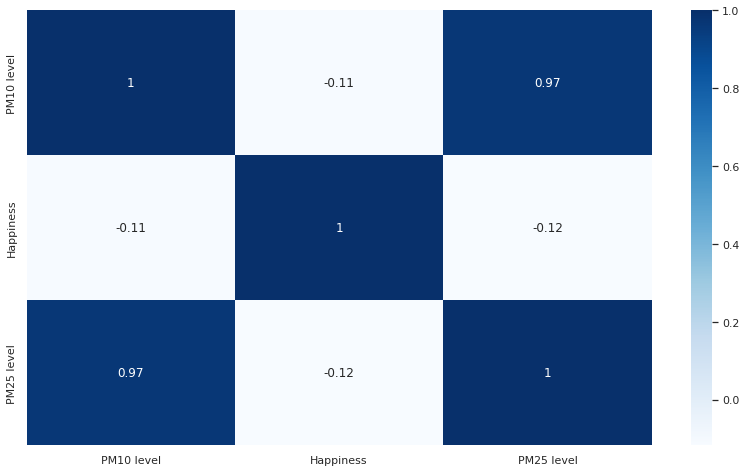

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

#import dataframe
df = pd.read_csv('/content/2011 full CSV.csv')
print(df)

#plot the correlation and annotate it with 2 decimal places.
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.2g')

# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):

    # Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    #A constant must be added to variance_inflation_factor or the results will be incorrect

    #:param df: the pandas dataframe containing only the predictor features, not the response variable
    #:param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    #:param thresh: the max VIF value before the feature is removed from the dataframe
    #:return: dataframe with multicollinear features removed
  
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

NameError: ignored

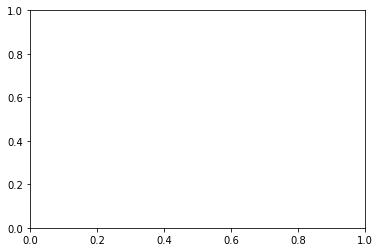

     Mean PM10 North  Mean Happiness North
0          12.441813              7.357273
1          12.549806              7.336364
2          11.661944              7.445455
3          12.405176              7.410000
4          12.180731              7.428182
..               ...                   ...
139        11.126929              7.398182
140        12.180450              7.361818
141        13.614118              7.365455
142        14.748550              7.367273
143        11.057671              7.314545

[144 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: ignored

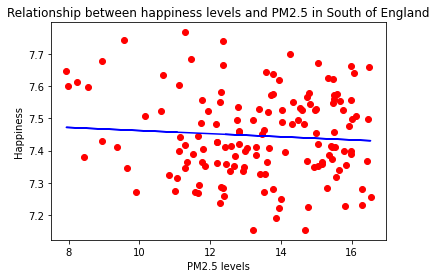

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from numpy import NaN
from sklearn.metrics import r2_score


df_data=pd.read_csv("/content/Pm10_north.csv")
y=df_data.iloc[:,1:].values
x=df_data.iloc[:,:1].values

print(df_data)

regressor=LinearRegression()
regressor.fit(x, y)
model = sm.OLS(y,x,missing='drop')
results = model.fit()

plt.scatter(x,y,color = 'red')
plt.plot(x,regressor.predict(x), color='blue')
plt.title('Relationship between happiness levels and PM2.5 in South of England')
plt.xlabel('PM2.5 levels')
plt.ylabel('Happiness')

y = df_data['Mean Happiness North']
x = df_data['Mean PM10 North']


x = sm.add_constant(x)
model = sm.OLS(x,y).fit()

print(model.summary())


In [ ]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

!mkdir data
!mkdir data/wk8
!curl https://storage.googleapis.com/qm2/wk7/cps.csv -o data/wk8/cps.csv


df=pd.read_csv('/content/PM25_means_only_300_features_used_for_summarystats.csv')
df.head()



summary=df.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary


def filter_outliers(var):
    q1 = var.quantile(0.25) # calculate the first quartile
    q3 = var.quantile(0.75) # calculate the third quartile
    iqr = q3 - q1 # calculate the interquartile range
    low = q1 - 3*iqr # calculate the lower bound
    high = q3 + 3*iqr # calculate the upper bound
    filtered = df[(var > low) & (var < high)] # filter  the values that are within the bounds
    dropped_observations= len(var)-len(filtered) # calculate the number of observations that were dropped

    print('Dropped {} observations'.format(dropped_observations))
    return  filtered

df=filter_outliers(df['2012']) # filter outliers from 2011

summary=df.describe().round(2).T
summary[['count','mean','std','min','max']]

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/wk8’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.4M  100 22.4M    0     0  10.1M      0  0:00:02  0:00:02 --:--:-- 10.1M
Dropped 0 observations


,count,mean,std,min,max
2011,300.0,11.59,1.95,6.74,17.64
2012,300.0,10.65,1.67,6.10,15.99
2013,300.0,11.06,1.62,6.81,16.17
2014,300.0,10.71,1.59,6.65,15.98
2015,300.0,8.92,1.38,5.27,12.87
2016,300.0,9.48,1.61,4.84,12.66
2017,300.0,8.97,1.78,4.94,12.85
2018,300.0,8.91,1.77,4.89,13.13
2019,300.0,9.04,1.64,4.40,12.74
2020,300.0,6.99,1.27,3.66,10.30


#This is my code for the regression. I'm adding it as text because it was built in Spyder and I fear messing our colab page up. 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from numpy import NaN

df_data = pd.read_csv("C:/Users/niawi/Onedrive/Documents/UCL/qmyear2/spyderdata/Reg_data_pm10/2011_pm10.csv")


df_data.dropna(inplace=True)

df_data.drop('Year', axis=1, inplace=True)

print(df_data)


y = df_data.iloc[:, 1:].values
x = df_data.iloc[:, :1].values

regressor = LinearRegression()
regressor.fit(x, y)
model = sm.OLS(y, x, missing='drop')
results = model.fit()

plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Relationship between happiness and levels \n of PM10 in different locations in 2011')
plt.xlabel('PM10 level')
plt.ylabel('Happiness')


#define response variable
y = df_data['Happiness']

#define predictor variables
x = df_data[['PM10 level']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

plt.savefig('2011_pm10.jpg', bbox_inches='tight')
plt.show()




